In [68]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.pyplot import figure
from sklearn import preprocessing

In [3]:
pwd

'/Users/mihaelanemes/Desktop/s2ds/code/fsa_mar20/notebooks'

In [4]:
cd /Users/mihaelanemes/Desktop/s2ds/data/Data/

/Users/mihaelanemes/Desktop/s2ds/data/Data


In [5]:
food_and_you_wales = pd.read_csv("food_and_you_all_waves_wales.csv")
print (food_and_you_wales)

      SerialNo  RespSex  age_dv  bhhsize2  below6  below16  marstat2  hhdinc  \
0       100027        2      -1        -1      -1        1         1       3   
1       100037        2      -1        -1      -1        2         1      -9   
2       100129        2      -1        -1      -1        2         1       4   
3       100130        1      -1        -1      -1        2         1       4   
4       100285        2      -1        -1      -1        2         1       4   
5       100314        1      -1        -1      -1        1         1       2   
6       100406        2      -1        -1      -1        2         2       2   
7       100591        2      -1        -1      -1        2         1      -9   
8       100815        2      -1        -1      -1        2         2       1   
9       100969        1      -1        -1      -1        2         2      -9   
10      101144        2      -1        -1      -1        1         1      -9   
11      101169        2      -1        -

In [6]:
# save outcome variable in new object

food_poisoning_last_year = pd.DataFrame(food_and_you_wales, columns=["bpoison"])


In [7]:
# check no of values in each column

print(food_and_you_wales.count())


SerialNo              1757
RespSex               1757
age_dv                1757
bhhsize2              1757
below6                1757
below16               1757
marstat2              1757
hhdinc                1757
workstat2             1757
region_dv             1757
religion_dv           1757
wimd_2014_quintile    1757
nimd_2010_quintile    1757
nimd2017_quintile     1757
UrbanRuralInd         1757
surveyyear            1757
country_dv            1757
psu_dv                1757
stratum_all_dv        1757
combinedW1_5weight    1757
countryW1_5weight     1757
CkRes                 1757
resfdprp              1757
CkFreq                1757
bcook3                1757
dietary               1757
fdreac_dv             1757
reacalle              1757
reacint               1757
reaccoe               1757
                      ... 
HeardFSA              1757
C1                    1757
C2                    1757
C3                    1757
C4                    1757
C5                    1757
C

In [8]:
# calculate length of rows 

no_rows = len (food_and_you_wales)
no_rows

1757

In [39]:
# calculate length of columns 

no_columns = len (food_and_you_wales [0])
no_columns

KeyError: 0

In [9]:
# remove values that are 'refused to answer', 'unknown' etc as nan

food_and_you_wales = food_and_you_wales.replace ([-9, -8, -1, 98], np.nan)    

In [10]:
# replace 'not applicable' in specific columns

cols = ['q4_1_4', 'q4_1_5a', 'Q4_1_5_comb', 'q4_1_6', 'q4_1_7', 'q4_1_8a', 'q4_1_8b', 'sanspray', 'q4_1_11',
        'q4_1_12', 'q4_1_13', 'q4_1_14', 'q4_1_15', 'q4_1_16', 'q4_1_17', 'q4_1_18', 'q4_1_19']

food_and_you_wales[cols] = food_and_you_wales[cols].replace([5], np.nan)


In [11]:
# check no of nans in each column

print(food_and_you_wales.count())

SerialNo              1757
RespSex               1757
age_dv                1029
bhhsize2               540
below6                1027
below16               1755
marstat2              1754
hhdinc                1332
workstat2              540
region_dv             1757
religion_dv           1748
wimd_2014_quintile    1029
nimd_2010_quintile       0
nimd2017_quintile        0
UrbanRuralInd         1757
surveyyear            1757
country_dv            1757
psu_dv                1757
stratum_all_dv        1757
combinedW1_5weight    1757
countryW1_5weight     1757
CkRes                 1029
resfdprp              1029
CkFreq                1029
bcook3                1029
dietary               1757
fdreac_dv             1029
reacalle               196
reacint                196
reaccoe                196
                      ... 
HeardFSA               540
C1                     509
C2                     517
C3                     507
C4                     517
C5                     508
C

In [12]:
# save responses from each wave in a new matrix variable

wave1 = [1]
food_and_you_wales_wave1 = food_and_you_wales.loc [food_and_you_wales['surveyyear'].isin(wave1)]

wave2 = [2]
food_and_you_wales_wave2 = food_and_you_wales.loc [food_and_you_wales['surveyyear'].isin(wave2)]

wave3 = [3]
food_and_you_wales_wave3 = food_and_you_wales.loc [food_and_you_wales['surveyyear'].isin(wave3)]

wave4 = [4]
food_and_you_wales_wave4 = food_and_you_wales.loc [food_and_you_wales['surveyyear'].isin(wave4)]

wave5 = [5]
food_and_you_wales_wave5 = food_and_you_wales.loc [food_and_you_wales['surveyyear'].isin(wave5)]


In [13]:
# create var to save all waves in one place

all_waves = ['food_and_you_wales_wave1', 'food_and_you_wales_wave2', 'food_and_you_wales_wave3',
            'food_and_you_wales_wave4', 'food_and_you_wales_wave5']


In [14]:
# standardize values by column

from sklearn import preprocessing
food_and_you_wales_std = preprocessing.StandardScaler(food_and_you_wales, with_mean=False)


In [15]:
print(food_and_you_wales_std)

StandardScaler(copy=      SerialNo  RespSex  age_dv  bhhsize2  below6  below16  marstat2  hhdinc  \
0       100027        2     NaN       NaN     NaN      1.0       1.0     3.0
1       100037        2     NaN       NaN     NaN      2.0       1.0     NaN
2       100129        2     NaN       NaN     NaN      ... NaN            NaN
1756            0.0            0.0            1.0

[1757 rows x 502 columns],
        with_mean=False, with_std=True)


In [89]:
# define var of interest

var_interest = food_and_you_wales_wave1['Q4_1_5_comb']

# calculate % of each response 

var_wave1 = food_and_you_wales_wave1['Q4_1_5_comb'].value_counts()/food_and_you_wales_wave1['Q4_1_5_comb'].count()*100
var_wave2 = food_and_you_wales_wave2['Q4_1_5_comb'].value_counts()/food_and_you_wales_wave2['Q4_1_5_comb'].count()*100
var_wave3 = food_and_you_wales_wave3['Q4_1_5_comb'].value_counts()/food_and_you_wales_wave3['Q4_1_5_comb'].count()*100
var_wave4 = food_and_you_wales_wave4['Q4_1_5_comb'].value_counts()/food_and_you_wales_wave4['Q4_1_5_comb'].count()*100
var_wave5 = food_and_you_wales_wave5['Q4_1_5_comb'].value_counts()/food_and_you_wales_wave5['Q4_1_5_comb'].count()*100


In [101]:
print (var_wave1)

4.0    59.292035
2.0    20.353982
1.0    15.929204
3.0     4.424779
Name: Q4_1_5_comb, dtype: float64


In [84]:
x_axis = [0,1,2,3,4]
y_axis = [var_wave1,var_wave2, var_wave3, var_wave4, var_wave5]
print(y_axis)

[[4.424778761061947, 15.929203539823009, 20.353982300884958, 59.29203539823009], [6.315789473684211, 22.105263157894736, 27.368421052631582, 44.21052631578947], [4.090909090909091, 13.863636363636363, 33.63636363636363, 48.40909090909091], [5.466970387243736, 12.984054669703873, 21.184510250569478, 60.36446469248291], [4.700854700854701, 11.965811965811966, 18.803418803418804, 64.52991452991454]]


In [102]:
var_wave1.columns = ['resp', 'percent']
print(var_wave1)

4.0    59.292035
2.0    20.353982
1.0    15.929204
3.0     4.424779
Name: Q4_1_5_comb, dtype: float64


In [100]:
resp_order = ['1.0', '2.0', '3.0', '4.0']


In [106]:
var_wave1.sort_values

<bound method Series.sort_values of 4.0    59.292035
2.0    20.353982
1.0    15.929204
3.0     4.424779
Name: Q4_1_5_comb, dtype: float64>

Text(0.5, 1.0, 'how often do you wash raw meat excl chicken')

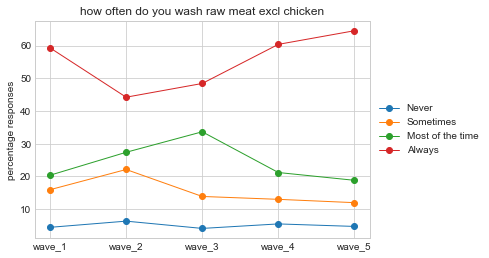

In [111]:
# plot by % - show trend over waves; line plot with percentage for data point and number of responses in brackets 
# time-series line plot - x-axis: waves; y-axis: %; data point labels: % value and no of responses; 
# example using data from fig 2.7: Q4_1_5_comb; q4_1_6; q4_1_7; q4_1_8a; q4_1_8b

%matplotlib inline
# plt.style.use('seaborn-whitegrid'
fig_raw_meat = plt.plot (x_axis, y_axis, 'o', linewidth=1.0, linestyle="-")

plt.xticks([0, 1, 2, 3, 4],
          ['wave_1','wave_2','wave_3','wave_4','wave_5'])
plt.ylabel('percentage responses')

plt.legend(['Never', 'Sometimes', 'Most of the time', 'Always'], loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('how often do you wash raw meat excl chicken')



In [ ]:
for x, y in zip(x_axis, y_axis):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

In [ ]:
# create new function to normalise by column between 0 and 1
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result


In [22]:
# import regression model
## could use Recursive feature elimination (?)
from sklearn import linear_model
